In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [25]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

dotwhisker installed


In [3]:
wage1 %>% head()

wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


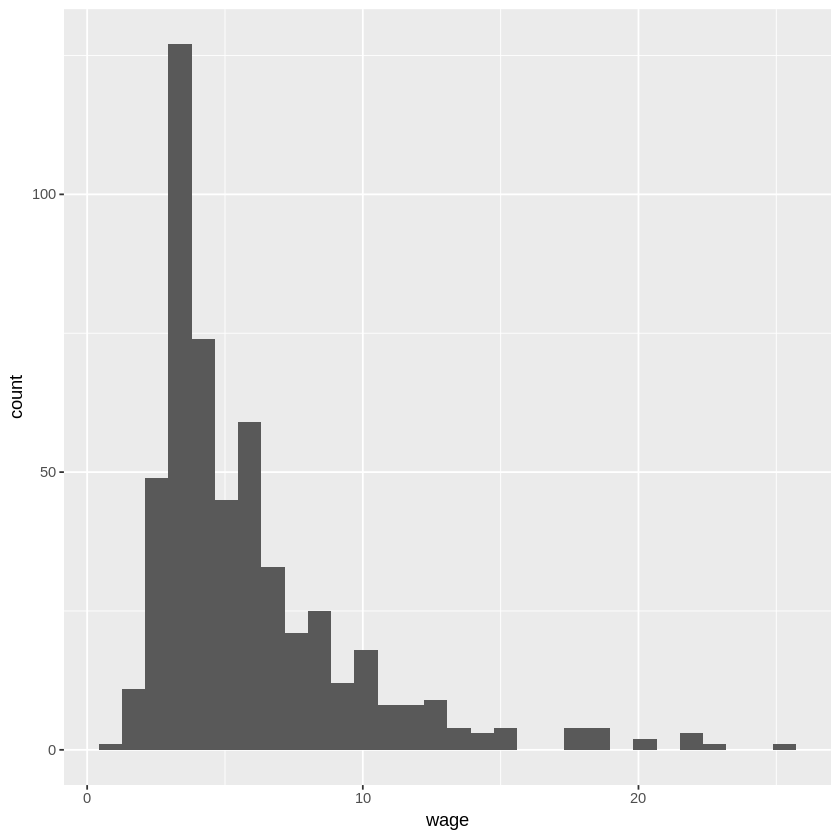

In [4]:
wage1 %>% ggplot(mapping = aes(x = wage))+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


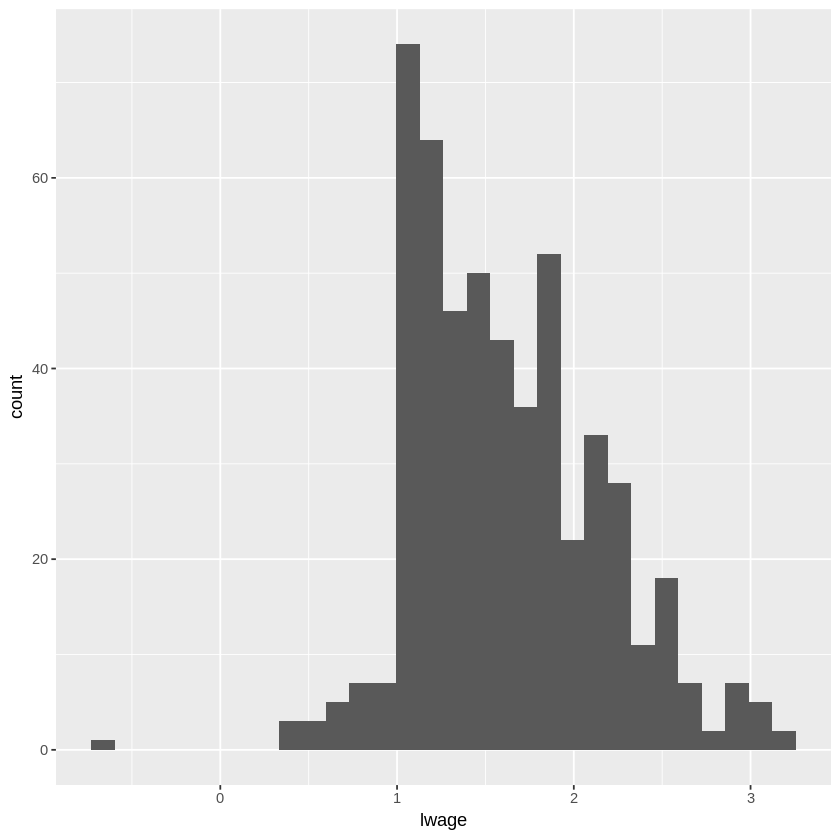

In [5]:
wage1 %>% ggplot(mapping = aes(x = lwage))+geom_histogram()

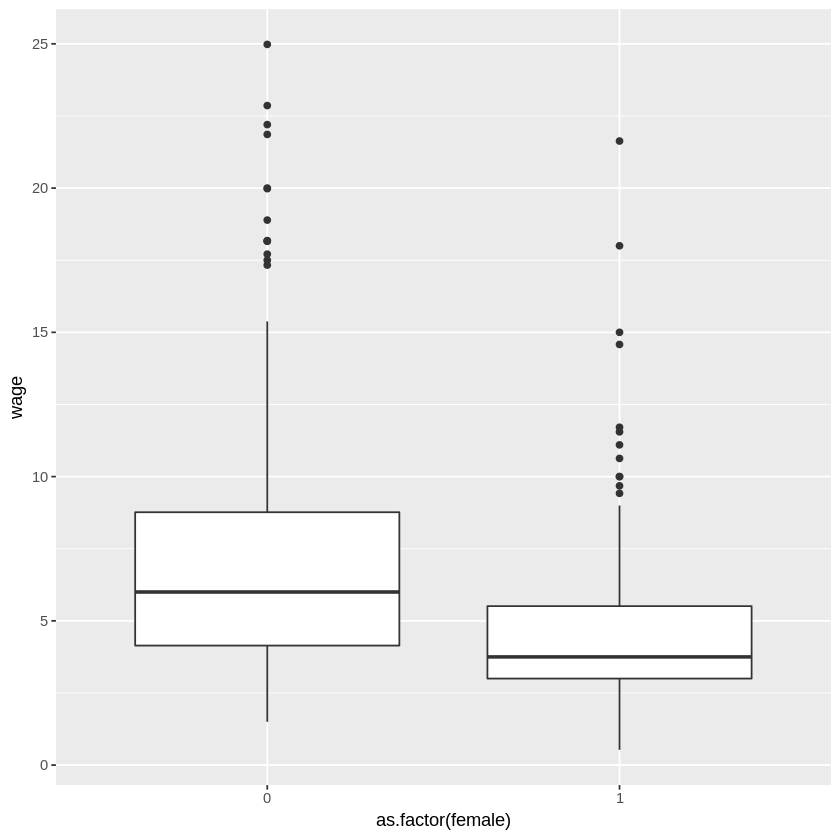

In [13]:
wage1 %>% ggplot(mapping = aes(x = as.factor(female), y =wage))+geom_boxplot()#+facet_wrap(facets = ~as.factor(female))


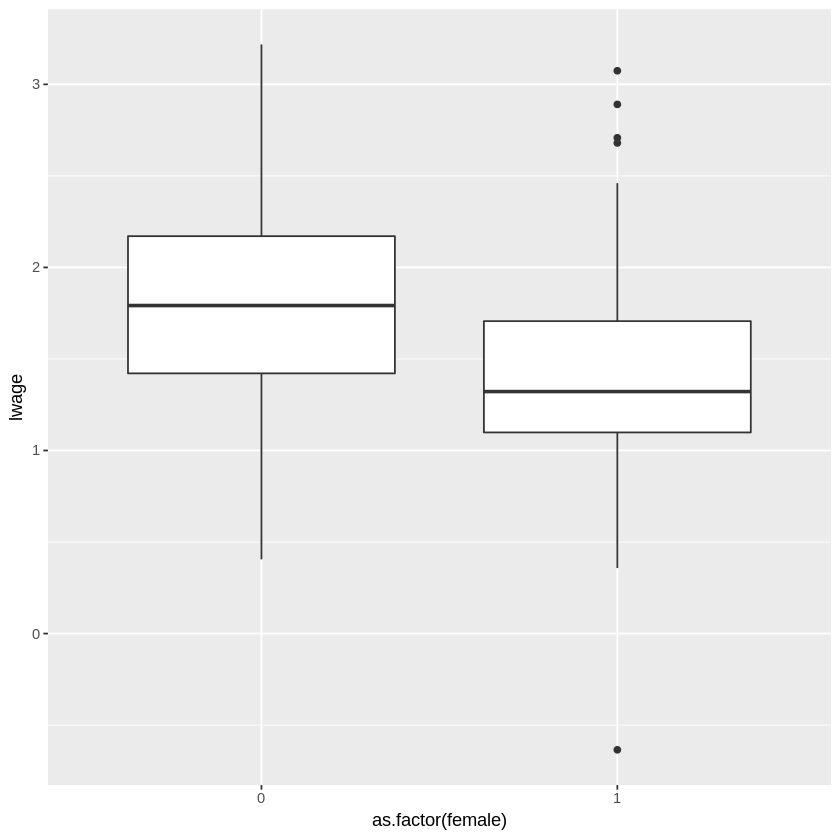

In [12]:
wage1 %>% ggplot(mapping = aes(x = as.factor(female), y =lwage))+geom_boxplot()#+facet_wrap(facets = ~as.factor(female))



In [16]:
wage1 %>% lm(lwage~female, data = .) %>% broom::tidy()

term,estimate,std.error,statistic,p.value
(Intercept),1.8135704,0.02981361,60.830276,1.222235e-239
female,-0.3972175,0.04307321,-9.221915,7.104308e-19


In [17]:
wage1 %>% lm(lwage~female, data = .) %>% vcov()

,(Intercept),female
(Intercept),0.0008888516,-0.0008888516
female,-0.0008888516,0.0018553013


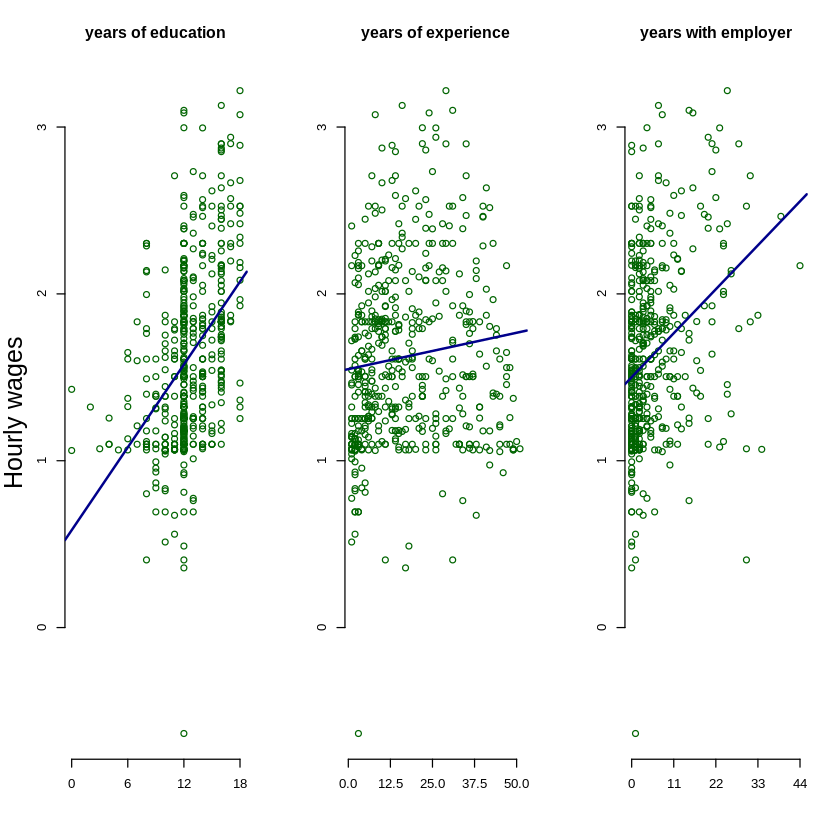

In [2]:
par(mfrow=c(1,3))

plot(y = wage1$lwage, x = wage1$educ, col="darkgreen", xaxt="n", frame = FALSE, main = "years of education", xlab = "", ylab = "")
mtext(side=2, line=2.5, "Hourly wages", cex=1.25)
axis(side = 1, at = c(0,6,12,18))
abline(lm(lwage ~ educ, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$exper, col="darkgreen", xaxt="n", frame = FALSE, main = "years of experience", xlab = "", ylab = "")
axis(side = 1, at = c(0,12.5,25,37.5,50))
abline(lm(lwage ~ exper, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$tenure, col="darkgreen", xaxt="n", frame = FALSE, main = "years with employer", xlab = "", ylab = "")
axis(side = 1, at = c(0,11,22,33,44))
abline(lm(lwage ~ tenure, data=wage1), col = "darkblue", lwd=2)

Estimate the model regressing educ, exper, and tenure against log(wage).

$$\widehat{log(wage)} = \beta_0 + \beta_1educ + \beta_3exper + \beta_4tenure$$

In [21]:
hourly_wage_model <- lm(lwage ~ educ + exper + tenure, data = wage1)

In [6]:
coefficients(hourly_wage_model)
kable(coefficients(hourly_wage_model), digits=4, col.names = "Coefficients", align = 'l')

(Intercept)        educ       exper      tenure 
0.284359541 0.092028988 0.004121109 0.022067218



|            |Coefficients |
|:-----------|:------------|
|(Intercept) |0.2844       |
|educ        |0.0920       |
|exper       |0.0041       |
|tenure      |0.0221       |

In [19]:
tidy(hourly_wage_model)

term,estimate,std.error,statistic,p.value
(Intercept),0.284359541,0.104190379,2.729230,6.562466e-03
educ,0.092028988,0.007329923,12.555246,8.824197e-32
exper,0.004121109,0.001723277,2.391437,1.713562e-02
tenure,0.022067218,0.003093649,7.133070,3.294407e-12


In [34]:
summ(hourly_wage_model, center = TRUE)

MODEL INFO:
Observations: 526
Dependent Variable: lwage
Type: OLS linear regression 

MODEL FIT:
F(3,522) = 80.39, p = 0.00
R² = 0.32
Adj. R² = 0.31 

Standard errors: OLS
-----------------------------------------------
                    Est.   S.E.   t val.      p
----------------- ------ ------ -------- ------
(Intercept)         1.62   0.02    84.45   0.00
educ                0.09   0.01    12.56   0.00
exper               0.00   0.00     2.39   0.02
tenure              0.02   0.00     7.13   0.00
-----------------------------------------------

Continuous predictors are mean-centered.

In [26]:
jtools::summ(hourly_wage_model, confint = TRUE, ci.width = .95)

MODEL INFO:
Observations: 526
Dependent Variable: lwage
Type: OLS linear regression 

MODEL FIT:
F(3,522) = 80.39, p = 0.00
R² = 0.32
Adj. R² = 0.31 

Standard errors: OLS
-------------------------------------------------------
                    Est.   2.5%   97.5%   t val.      p
----------------- ------ ------ ------- -------- ------
(Intercept)         0.28   0.08    0.49     2.73   0.01
educ                0.09   0.08    0.11    12.56   0.00
exper               0.00   0.00    0.01     2.39   0.02
tenure              0.02   0.02    0.03     7.13   0.00
-------------------------------------------------------

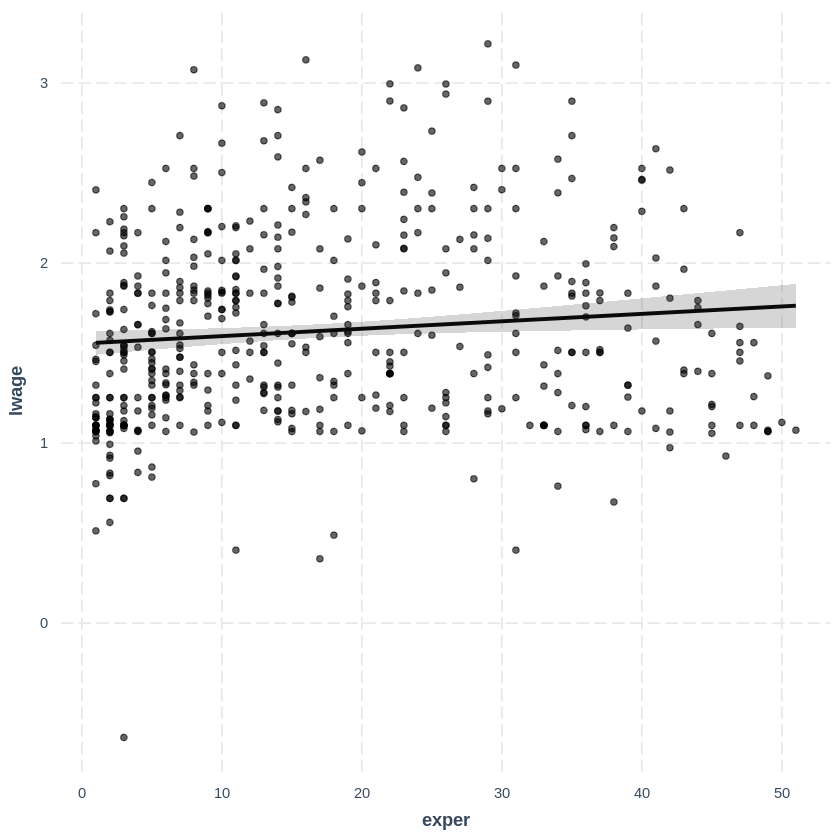

In [29]:
effect_plot(hourly_wage_model, pred = exper, interval = TRUE, plot.points = TRUE)

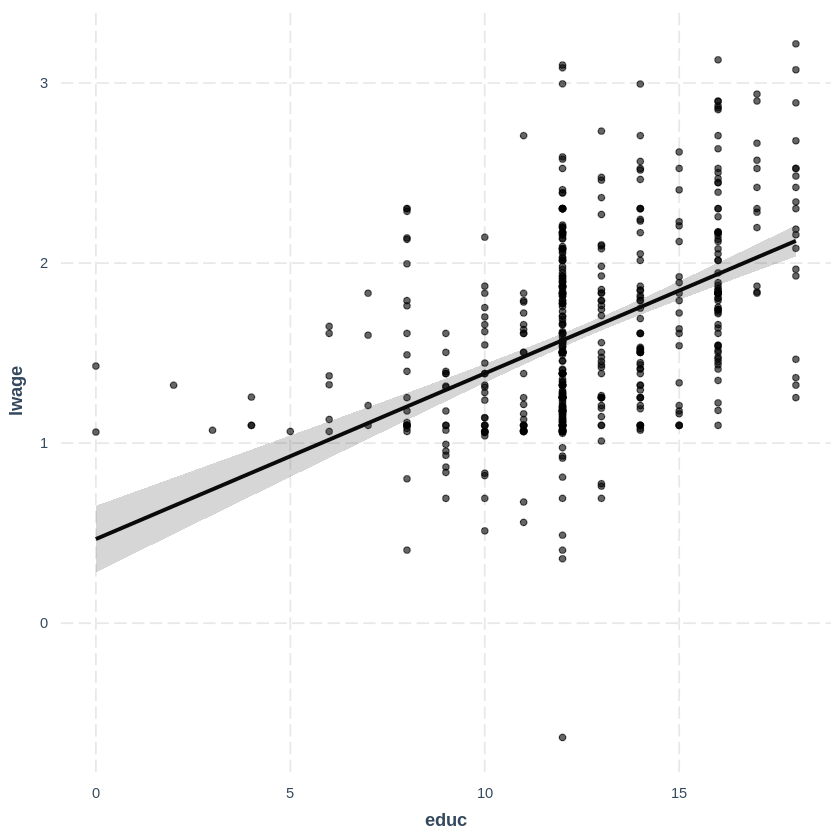

In [30]:
effect_plot(hourly_wage_model, pred = educ, interval = TRUE, plot.points = TRUE)

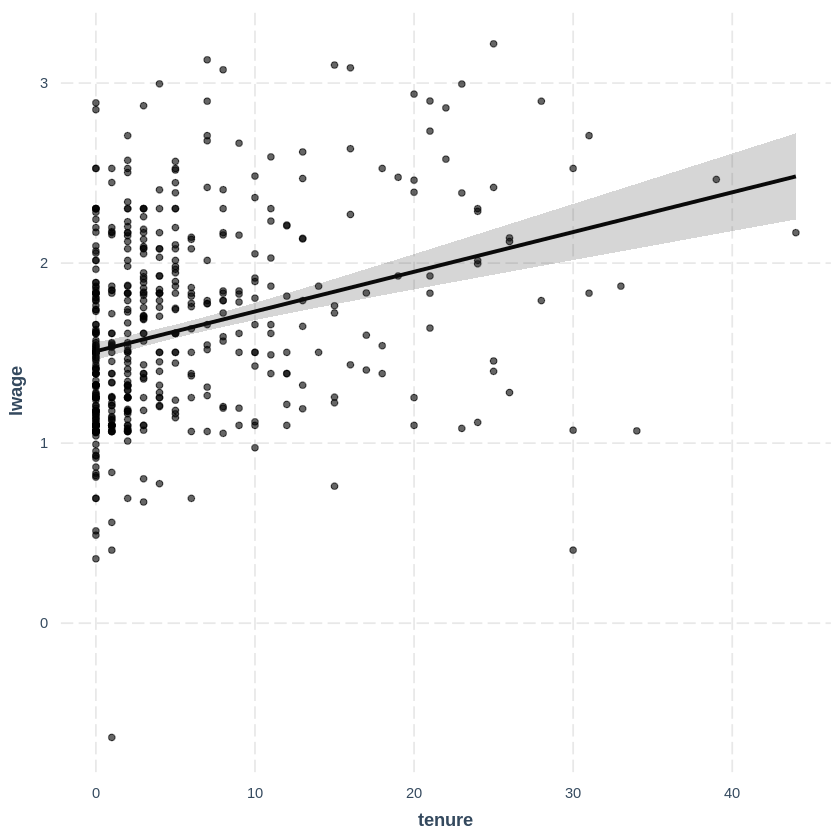

In [31]:
effect_plot(hourly_wage_model, pred = tenure, interval = TRUE, plot.points = TRUE)

https://cran.r-project.org/web/packages/jtools/vignettes/summ.html

Here’s a quick (not comprehensive) list of functionality supported by summ:

    Summaries for lm, glm, svyglm (survey), merMod (lme4), and rq (quantreg) models.
    Variable scaling and centering
    Robust standard errors (for lm and glm plus quantreg’s built-in options for rq models)
    Confidence intervals, VIFs, and partial correlations (lm only) can optionally be included in the output
    p-values can be dropped from the output
    R^2 (lm, linear svyglm), pseudo-R^2 (glm, merMod), R^1 (rq), and other model fit statistics are calculated and reported. These can also be suppressed if you don’t want them.
    Ability to choose defaults for many options using set_summ_defaults to reduce the need to do redundant typing in interactive use.

Model types supported are lm, glm, svyglm, merMod, and rq, though not all will be reviewed in detail here.

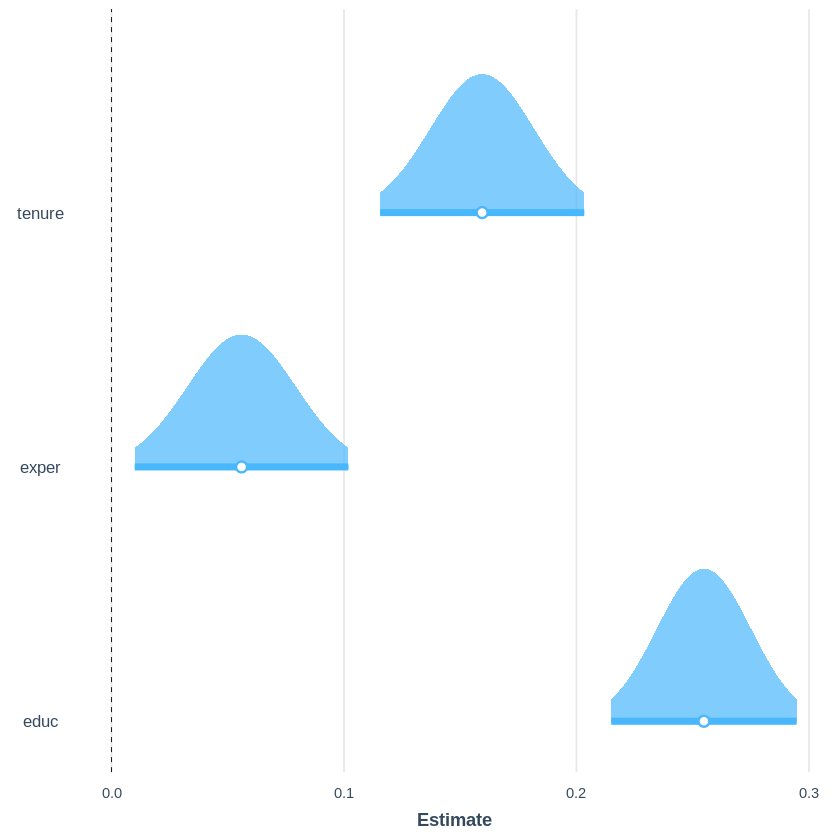

In [32]:
jtools::plot_summs(hourly_wage_model, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

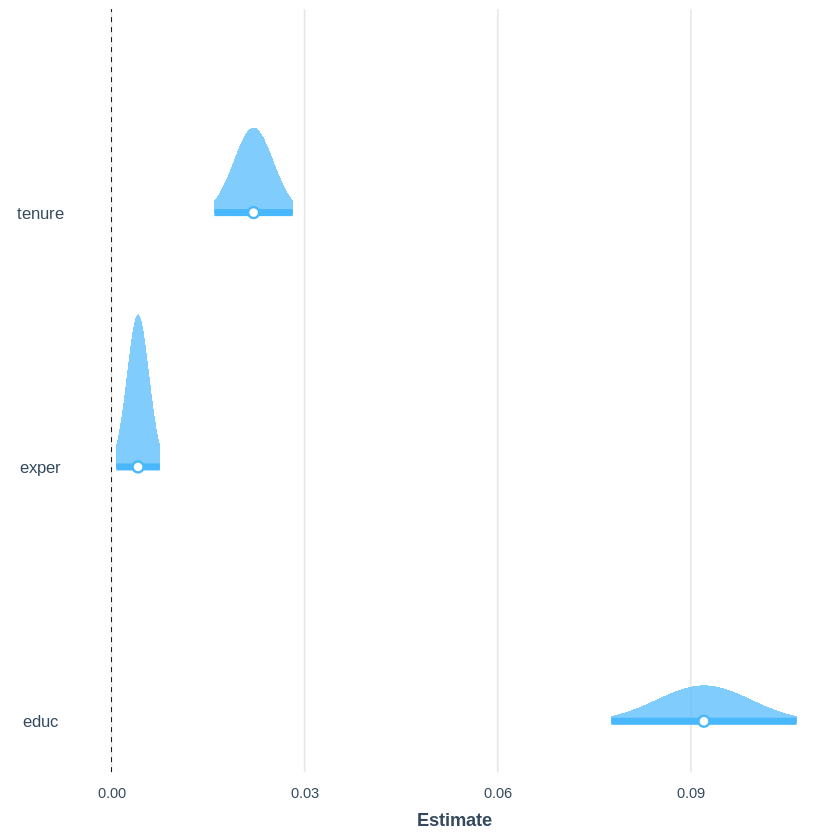

In [33]:
jtools::plot_summs(hourly_wage_model, plot.distributions = TRUE, inner_ci_level = .95)

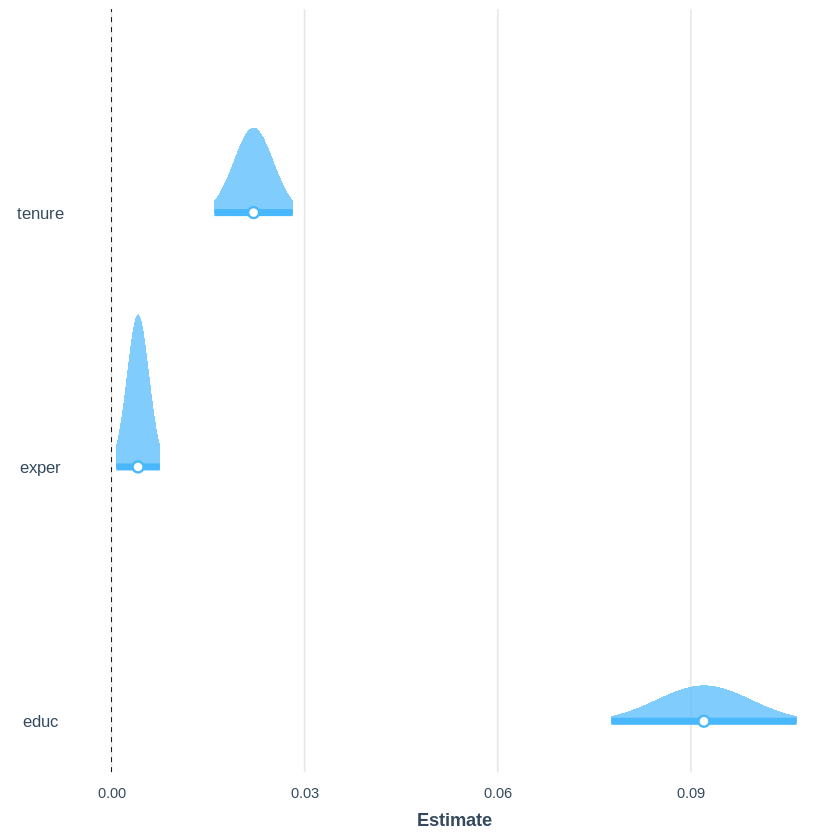

In [23]:
jtools::plot_coefs(hourly_wage_model, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

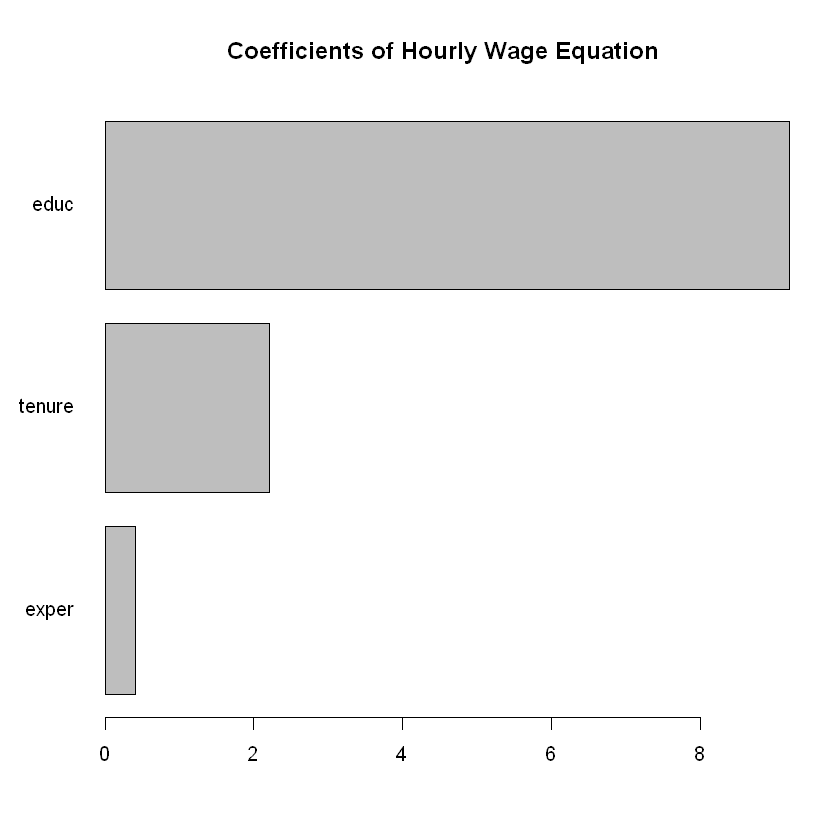

In [5]:
barplot(sort(100*hourly_wage_model$coefficients[-1]), horiz=TRUE, las=1,
        ylab = " ", main = "Coefficients of Hourly Wage Equation")

In [ ]:
https://www.r-econometrics.com/reproduction/wooldridge